# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch as torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from collections import namedtuple,deque
from torch import optim as optim
import random

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
FILE_NAME = "./Reacher_Linux/Reacher.x86_64"

In [3]:
env = UnityEnvironment(file_name=FILE_NAME)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.36999999172985554


When finished, you can close the environment.

In [7]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
STATE_SIZE = 33 #TODO: obtain it from unity env
ACTION_SIZE = 4 #TODO: obtain it from unity env
REPLAY_BUFFER_SIZE = 100000 #same as deepmind paper
TRAIN_EVERY = 4  #same as DQN paper
UPDATE_TARGET_NETWORK_EVERY = TRAIN_EVERY
TAU = 0.001 #used for soft updates of target networks,same as deepmind paper
BATCH_SIZE =64 #same as deepmind paper
VISUALIZE_EVERY = 50 #how many episodes to train before watching unity env simulation
PRINT_EVERY = 10 #how many steps to train before printing training info

DESIRED_AVERAGE_SCORE = 33
DESIRED_EPISODES_AVERAGE = 100

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [10]:
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples for experience replay"""
    def __init__(self,action_size,buffer_size):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
        """
        self.action_size =  action_size
        self.buffer_size = buffer_size
        self.memory  = deque(maxlen = buffer_size)
        self.experience = namedtuple("Experience",field_names=["state", "action", "reward", "next_state", "done"])
        
    def add(self,state,action,reward,next_state,done):
        "Add a new experience tuple to replay buffer"
        new_experience = self.experience(state,action,reward,next_state,done)
        self.memory.append(new_experience)
        
    def sample(self,batch_size):
        "Get a sample of the buffer of size=batch_size"
        experience_batch = random.sample(self.memory,k=batch_size)
        
        states =  torch.from_numpy(np.vstack([e.state  for e in experience_batch if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experience_batch if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experience_batch if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experience_batch if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experience_batch if e is not None]).astype(np.uint8)).to(device)
        
        return (states,actions,rewards,next_states,dones)
    
    def __len__(self):
        """"Return the current size of internal memory."""
        return len(self.memory)

In [11]:
import copy
class OUNoise:
    """Orstein-uhlenbeck process"""
    
    def __init__(self,size,mu=0.0,theta=0.15,sigma=0.2):
        self.size = size
        self.mu = mu*np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.reset()
        
    def reset(self):
        self.state = copy.copy(self.mu)
        
    def sample(self):
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.standard_normal(self.size)
        self.state = x + dx
        
        
        return self.state

In [12]:
def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

In [13]:
class Actor(torch.nn.Module):
    def __init__(self,state_size,action_size):
        super(Actor,self).__init__()
        self.action_size = action_size
        self.fc1 = torch.nn.Linear(state_size,400)
        #torch.nn.init.xavier_uniform_(self.fc1.weight)
        #self.bn1 = torch.nn.BatchNorm1d(num_features = state_size)
        self.fc2 = torch.nn.Linear(400,300)
        #torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.fc_output = torch.nn.Linear(300,action_size)
        #torch.nn.init.xavier_uniform_(self.fc_output.weight,gain=0.01)
        self.reset_parameters()
    
    def forward(self,x):
        #x = F.relu(self.fc1(self.bn1(x)))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        y = F.tanh(self.fc_output(x))
        #y = self.fc_output(x)
        return y
    
    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc_output.weight.data.uniform_(-3e-3, 3e-3)

In [14]:
class Critic(torch.nn.Module):
    def __init__(self,state_size,action_size):
        super(Critic,self).__init__()
        self.fc1 = torch.nn.Linear(state_size+action_size,400)
        #torch.nn.init.xavier_uniform_(self.fc1.weight)
        #self.bn1 = torch.nn.BatchNorm1d(num_features=state_size)
        self.fc2 = torch.nn.Linear(400,300)
        #torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.fc_output = torch.nn.Linear(300,1)
        #torch.nn.init.xavier_uniform_(self.fc_output.weight,gain=0.01)
        self.reset_parameters()
    
    def forward(self,x,actions):
        #x_norm = self.bn1(x)
        #x = torch.cat((x_norm,actions),dim=1)
        x = torch.cat((x,actions),dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        y = self.fc_output(x)
        
        return y
    
    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc_output.weight.data.uniform_(-3e-4, 3e-4)

In [15]:
class Agent:
    def __init__(self,state_size,action_size,replay_buffer_size,device):
        self.actor_local = Actor(state_size,action_size).to(device)
        self.critic_local = Critic(state_size,action_size).to(device)
        self.actor_target =  Actor(state_size,action_size).to(device)
        self.critic_target = Critic(state_size,action_size).to(device)
        
        self.device = device
        
        self.replay_buffer = ReplayBuffer(action_size,replay_buffer_size)
        
        #start target networks with copy of local networks(tau=1)
        self.update_target_actor(1)
        self.update_target_critic(1)
        self.actor_target.eval()
        self.critic_target.eval()
        
        # same learning rate used in deepmind paper https://arxiv.org/pdf/1509.02971.pdf
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(),lr=3e-4)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(),lr=3e-4)
        
        #noise
        self.noise = OUNoise(size=action_size)
        
        self.critic_losses = []
        self.actor_losses = []
        
    def act(self,state):
        state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
        
        # get action from actor in evaluation mode and specifying no need no gradient is needed,
        #after that return to train mode
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
            
        self.actor_local.train()
        noise = self.noise.sample()
        #print(action,noise)
        action = np.clip(action + noise,-1,1)
        #print(action)
        
        
        return action
    
    def train(self,batch_size,step_num=0,print_every= 100):
        (states, actions, rewards, next_states, dones) = self.replay_buffer.sample(batch_size)
        
        
        # train critic
        self.actor_target.eval()
        self.critic_target.eval()
        
        with torch.no_grad():
            next_target_actions = self.actor_target(next_states)
            #next_states_stack_actions = torch.cat((next_states,next_target_actions),dim=1)
            target_q_values = self.critic_target(next_states,next_target_actions)
            target_return  = rewards + 0.99*target_q_values#*(1.0-dones)
        
        #next_target_actions = self.actor_target(next_states)
            #next_states_stack_actions = torch.cat((next_states,next_target_actions),dim=1)
        #target_q_values = self.critic_target(next_states,next_target_actions)
        #target_return  = rewards + 0.99*target_q_values#*(1.0-dones)
            
        #concatenate(stack) states and actions to feed to q network wich returns a value
        #states_stack_actions = torch.cat((states,actions),dim=1)
        self.critic_local.train()
        
        current_critic_estimate = self.critic_local(states,actions)
        critic_mse_loss = F.mse_loss(current_critic_estimate,target_return)
        
        self.critic_optimizer.zero_grad()
        critic_mse_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(),1)
        self.critic_optimizer.step()
        
        #train actor
        local_actions = self.actor_local(states)
        #actor_states_stack_actions = torch.cat((states,local_actions),dim=1)
        actor_mse_loss = -self.critic_local(states,local_actions).mean()
        
        self.actor_optimizer.zero_grad()
        actor_mse_loss.backward()
        self.actor_optimizer.step()
        
        if step_num % print_every == 0:
            self.actor_losses.append(actor_mse_loss.cpu().data.numpy())
            self.critic_losses.append(critic_mse_loss.cpu().data.numpy())
    
    
    def update_target_network(self,local_network,target_network,tau):
        """
        Do a soft update of target network with local network
        Params:
            local_network: PyTorch model (weights will be copied from)
            target_network: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param,local_param in zip(target_network.parameters(),local_network.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0 - tau)*target_param.data)
        """for target_param, local_param in zip(target_network.parameters(), local_network.parameters()):
            target_param.data.copy_(local_param.data )"""
        
            
    def update_target_actor(self,tau):
        self.update_target_network(self.actor_local,self.actor_target,tau)
        
    def update_target_critic(self,tau):
        self.update_target_network(self.critic_local,self.critic_target,tau)

In [16]:
#actor = Actor(STATE_SIZE,ACTION_SIZE)
#critic = Critic(STATE_SIZE)

agent = Agent(STATE_SIZE,ACTION_SIZE,REPLAY_BUFFER_SIZE,device)

In [19]:
def train(agent,episodes,visualize_every,print_every):
    
    total_rewards = []
    episode_window_scores = deque(maxlen = DESIRED_EPISODES_AVERAGE)
    
    for episode in range(1,episodes+1):
        finished = False
        step_count = 0
        episode_rewards = []
        episode_return = 0
        
        agent.noise.reset()
        train_mode = not(episode%visualize_every == 0)
        env_info = env.reset(train_mode=train_mode)[brain_name]
        state = env_info.vector_observations[0]
        
    
        
        while not finished:
            action = agent.act(state)
            
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            finished = env_info.local_done[0]
            
            # add experience to replay buffer
            agent.replay_buffer.add(state,action,reward,next_state,finished)
            episode_return += reward
            episode_rewards.append(reward)
            
            #critic_loss(reward,state,next_state,device)
            
            #critic_loss = 0.0001*td_error*agent.critic()
            
            state = next_state
            
            if step_count % TRAIN_EVERY == 0 and len(agent.replay_buffer) >= BATCH_SIZE:
                agent.train(BATCH_SIZE,step_count,100)
            
            if step_count % UPDATE_TARGET_NETWORK_EVERY == 0 and len(agent.replay_buffer) >= BATCH_SIZE:
                agent.update_target_actor(TAU)
                agent.update_target_critic(TAU)
                
            step_count += 1
                
        total_rewards.append(episode_return)
        episode_window_scores.append(episode_return)
        
        if episode % print_every == 0:
            print("Episode:{} steps:{} episode_reward:{} last n mean rew.{}".format(episode, step_count,
                                                                                    episode_return,np.mean(episode_window_scores)))
                
    
        
        
        if np.mean(episode_window_scores) >= DESIRED_AVERAGE_SCORE:
            print("Solved in {} episodes".format(episode))
            checkpoint_name = "checkpoint_solved_"+str(episode)+".pth"
            torch.save(agent.actor_local.state_dict(), "actor_"+ checkpoint_name)
            torch.save(agent.critic_local.state_dict(),"critic_"+checkpoint_name)
            solved = True
            break
            
    return total_rewards
        
        

rewards = train(agent,1000,VISUALIZE_EVERY,PRINT_EVERY)

Episode:10 steps:1001 episode_reward:0.7499999832361937 last n mean rew.0.7429999833926558
Episode:20 steps:1001 episode_reward:0.30999999307096004 last n mean rew.0.7529999831691384
Episode:30 steps:1001 episode_reward:0.6899999845772982 last n mean rew.0.8659999806433916
Episode:40 steps:1001 episode_reward:1.4699999671429396 last n mean rew.0.9202499794308097
Episode:50 steps:1001 episode_reward:3.9599999114871025 last n mean rew.1.1565999741479756
Episode:60 steps:1001 episode_reward:2.6899999398738146 last n mean rew.1.4058333019105096
Episode:70 steps:1001 episode_reward:3.7499999161809683 last n mean rew.1.7284285327951823
Episode:80 steps:1001 episode_reward:4.019999910145998 last n mean rew.2.105374952941202
Episode:90 steps:1001 episode_reward:15.429999655112624 last n mean rew.2.4505555007813706
Episode:100 steps:1001 episode_reward:4.419999901205301 last n mean rew.2.6595999405533077
Episode:110 steps:1001 episode_reward:9.859999779611826 last n mean rew.3.2974999262951314


## Train plots

#### Rewards

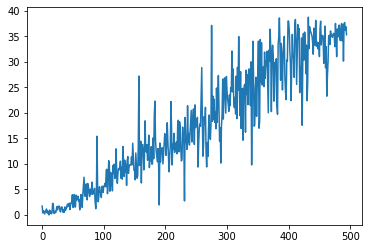

In [20]:
plt.plot(rewards)

#### Critic loss

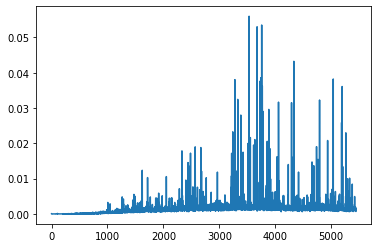

In [21]:
plt.plot(agent.critic_losses)

#### Actor Loss

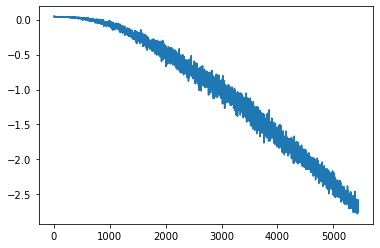

In [22]:
plt.plot(agent.actor_losses)